In [105]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
import matplotlib.dates as mdates
import numpy as np
from datetime import timedelta
from tqdm import tqdm
import matplotlib.animation as animation

In [106]:
#d = pd.read_csv('./processed_opc/DASH_SAMP_PARAM_RESAMP_240528.csv')
d = pd.read_csv('./processed_opc/DASH_SAMP_PARAM_RESAMP_240531.csv')

In [107]:
#d = d[d['UpSt_Dia']==600]
#d =d.reset_index(drop=['index'])

In [108]:
d

,Samp_Num,Start_Date_Time_UTC,Mid_Date_Time_UTC,Stop_Date_Time_UTC,Samp_Time_s,data_points,UpSt_Dia,HM_RH_Av,HM_RH_Sdev,HO_RH_Av,...,HO_Bin63,HO_Bin64,HO_Bin65,HO_Bin66,HO_Bin67,HO_Bin68,HO_Bin69,HO_Bin70,HO_Bin71,HO_Bin72
0,1,2024-05-31 12:31:39.201600,2024-05-31 12:31:45.202080,2024-05-31 12:31:51.202560,13.00096,12,200.0,85.385714,1.044294,83.564286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2024-05-31 12:31:51.202560,2024-05-31 12:31:55.699680,2024-05-31 12:32:00.196800,9.99424,9,200.0,85.581818,0.921757,83.836364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2024-05-31 12:32:00.196800,2024-05-31 12:32:04.197120,2024-05-31 12:32:08.197440,9.00064,8,200.0,84.610000,0.670738,84.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2024-05-31 12:32:08.197440,2024-05-31 12:32:09.700800,2024-05-31 12:32:11.204160,4.00672,3,200.0,85.540000,0.313050,84.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2024-05-31 12:32:11.204160,2024-05-31 12:32:16.751040,2024-05-31 12:32:22.297920,12.09376,11,200.0,84.561538,0.732050,84.461538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1674,2024-05-31 18:26:55.697279999,2024-05-31 18:27:04.700159999,2024-05-31 18:27:13.703040,19.00576,18,200.0,84.230000,1.146666,89.455000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1674,1675,2024-05-31 18:27:13.703040,2024-05-31 18:27:17.202240,2024-05-31 18:27:20.701440,7.99840,7,200.0,84.544444,1.171656,89.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675,1676,2024-05-31 18:27:20.701440,2024-05-31 18:27:27.198720,2024-05-31 18:27:33.696000,13.99456,13,200.0,84.746667,0.957576,89.306667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,1677,2024-05-31 18:27:33.696000,2024-05-31 18:27:36.197280,2024-05-31 18:27:38.698560,6.00256,5,200.0,85.414286,0.798809,89.214286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
bins = pd.read_csv('./data/DASH_Bins_2023.csv')

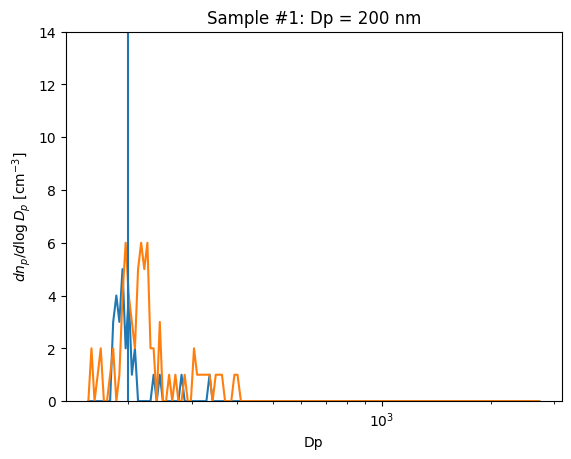

In [110]:
DO_Bin = [col for col in d.columns if 'DO_Bin' in col]
HO_Bin = [col for col in d.columns if 'HO_Bin' in col]

fig,ax = plt.subplots()
for i in range(0,len(d)):
    ax.set_ylim([0,d.loc[:, DO_Bin + HO_Bin].max().max()])
    ax.plot(bins['Dp_nm'][:-1], d.loc[i, DO_Bin])
    ax.plot(bins['Dp_nm'][:-1], d.loc[i, HO_Bin])
    ax.set_xscale('log')
    ax.set_xlabel('Dp')
    ax.set_ylabel('$dn_p/d\log D_p$ [cm$^{-3}$]')
    ax.set_title('Sample #' + str(d.loc[i, 'Samp_Num']) + ': Dp = ' + str(round(d.loc[i, 'UpSt_Dia'])) + ' nm')
    ax.vlines(d.loc[i, 'UpSt_Dia'],0,d.loc[:, DO_Bin + HO_Bin].max().max())
    break

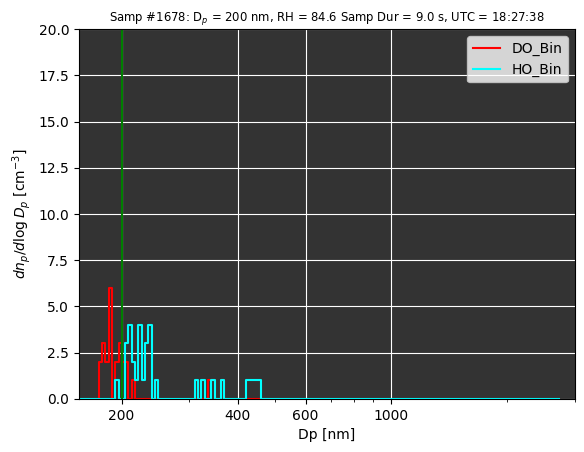

In [111]:
fig, ax = plt.subplots()
m_r = 20
def init():
    max_y = d.loc[:, DO_Bin + HO_Bin].max().max()
    ax.set_xscale('log')
    ax.set_xlim(bins['Dp_nm'].min(), bins['Dp_nm'].max())
    #ax.set_ylim([0,d.loc[:, DO_Bin + HO_Bin].max().max()])
    #ax.set_ylim([0,max_y])
    ax.set_ylim([0,m_r])
    ax.set_xscale('log')
    ax.set_xlabel('Dp [nm]')
    ax.set_ylabel('$dn_p/d\log D_p$ [cm$^{-3}$]')
    # Custom ticks and labels
    ticks = [200,400,600,1000]
    labels = ['200','400','600','1000']

    # Set custom tick labels
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    return fig,

def update(i):
    max_y = d.loc[i, DO_Bin + HO_Bin].max().max()#d.loc[:, DO_Bin + HO_Bin].max().max()
    ax.clear()
    ax.set_ylim([0,m_r])
    ax.set_xscale('log')
    ax.step(bins['Dp_nm'][:-1], d.loc[i, DO_Bin], label='DO_Bin', color='r')
    ax.step(bins['Dp_nm'][:-1], d.loc[i, HO_Bin], label='HO_Bin', color='cyan')
    ax.set_facecolor((0.2, 0.2, 0.2))
    ax.grid(c = 'w')
    ax.set_xscale('log')
    ax.set_title('Samp #' + str(d.loc[i, 'Samp_Num']) + ': D$_p$ = ' + str(round(d.loc[i, 'UpSt_Dia'])) + ' nm, RH = ' + str(round(d.loc[i, 'HM_RH_Av'],1))  + ' Samp Dur = '+ str(round(d.loc[i, 'Samp_Time_s'], 1)) + ' s, UTC = ' + str(d.loc[i, 'Start_Date_Time_UTC'])[11:19], fontsize='small')
    #ax.vlines(d.loc[i, 'UpSt_Dia'],0,max_y, color='r')
    ax.vlines(d.loc[i, 'UpSt_Dia'],0,m_r, color='green')
    ax.legend()
    # Custom ticks and labels
    ticks = [200,400,600,1000]
    labels = ['200','400','600','1000']

    # Set custom tick labels
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Dp [nm]')
    ax.set_ylabel('$dn_p/d\log D_p$ [cm$^{-3}$]')
    return fig,

ani = animation.FuncAnimation(fig, update, frames=len(d), init_func=init, blit=False)

# Save the animation
writer = animation.FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save('./figures/dist-2024_05_31.mp4', writer=writer, dpi=300)

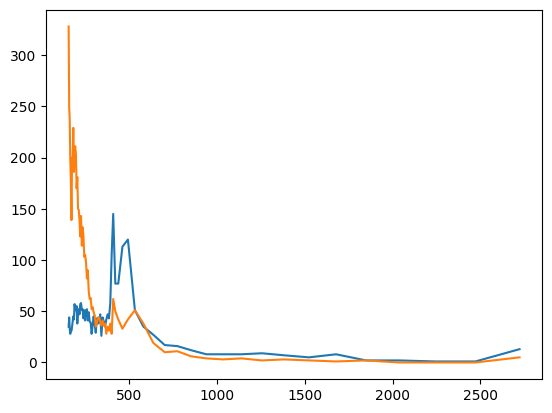

In [23]:
plt.plot(bins['Dp_nm'][:-1], d.loc[:, DO_Bin].max())
plt.plot(bins['Dp_nm'][:-1], d.loc[:, HO_Bin].max())